# Questão 01

![alt text](../Questão1.png)


== Posição final x(10s) para cada método ==
Euler explícito (simples):    x = 360.5657751217 m
Euler com append:             x = 360.6277283442 m
Euler com pré-alocação:       x = 360.5657751217 m
Runge-Kutta 4ª ordem:         x = 360.5218523480 m

Tempos de execução (segundos) para cada método:
+---------+-------------------+--------------------+---------------------+-----------------+
|       N |   Euler explícito |   Euler com append |   Euler pré-alocado |   Runge-Kutta 4 |
+=========+===================+====================+=====================+=================+
|    1000 |          0.000131 |           0.000132 |            0.000102 |        0.000725 |
+---------+-------------------+--------------------+---------------------+-----------------+
|   10000 |          0.001028 |           0.001357 |            0.001073 |        0.007806 |
+---------+-------------------+--------------------+---------------------+-----------------+
|  100000 |          0.012881 |           0.014209 

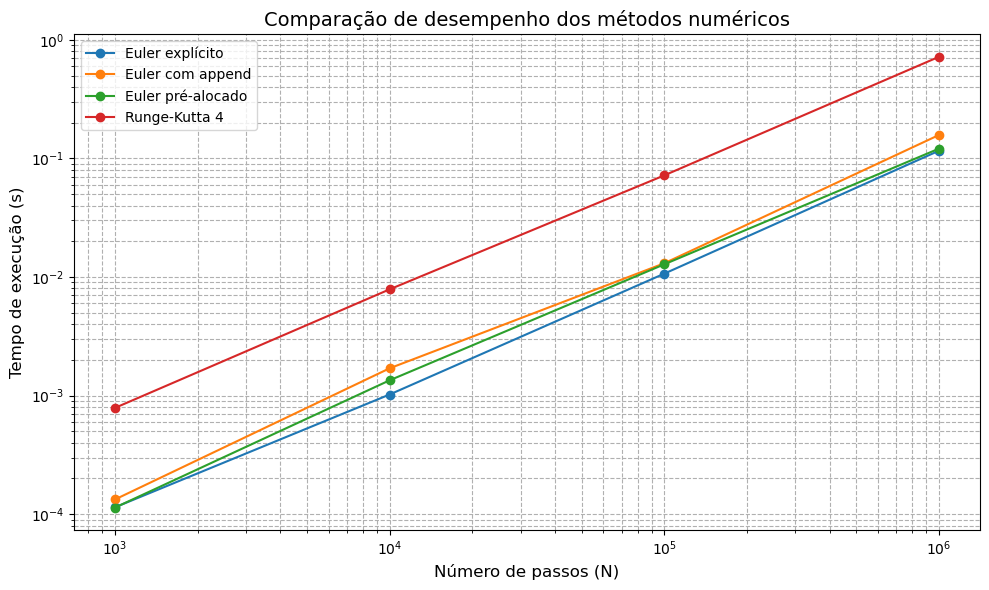

In [28]:

import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate

# Constantes
g = 9.8
k = 0.1
t_final = 10

# Métodos numéricos
def euler_explicito(dt, t_final):
    N = int(t_final / dt)
    x = v = 0
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
    return x

def euler_append(dt, t_final):
    t = x = v = 0
    while t < t_final:
        v += (g - k * v) * dt
        x += v * dt
        t += dt
    return x

def euler_prealloc(dt, t_final):
    N = int(t_final / dt)
    v = x = 0
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
    return x

def runge_kutta(dt, t_final):
    N = int(t_final / dt)
    v = x = 0
    for _ in range(N):
        k1v = g - k * v
        k1x = v
        
        k2v = g - k * (v + 0.5*dt*k1v)
        k2x = v + 0.5*dt*k1v
        
        k3v = g - k * (v + 0.5*dt*k2v)
        k3x = v + 0.5*dt*k2v
        
        k4v = g - k * (v + dt*k3v)
        k4x = v + dt*k3v
        
        v += (dt/6) * (k1v + 2*k2v + 2*k3v + k4v)
        x += (dt/6) * (k1x + 2*k2x + 2*k3x + k4x)
    return x

def comparar_resultados():
    dt = 0.001
    
    # Calcular posições finais
    x1 = euler_explicito(dt, t_final)
    x2 = euler_append(dt, t_final)
    x3 = euler_prealloc(dt, t_final)
    x4 = runge_kutta(dt, t_final)
    
    # Saída numérica
    print("\n== Posição final x(10s) para cada método ==")
    print(f"Euler explícito (simples):    x = {x1:.10f} m")
    print(f"Euler com append:             x = {x2:.10f} m")
    print(f"Euler com pré-alocação:       x = {x3:.10f} m")
    print(f"Runge-Kutta 4ª ordem:         x = {x4:.10f} m")
    
# Executar
comparar_resultados()
    
def comparar_metodos():
    N_values = [10**3, 10**4, 10**5, 10**6]
    methods = [
        ("Euler explícito", euler_explicito),
        ("Euler com append", euler_append),
        ("Euler pré-alocado", euler_prealloc),
        ("Runge-Kutta 4", runge_kutta)
    ]

    # Preparar dados para tabela
    table_data = []
    headers = ["N"] + [name for name, _ in methods]
    
    for N in N_values:
        dt = t_final / N
        row = [N]
        for _, method in methods:
            t0 = time.perf_counter()
            method(dt, t_final)
            elapsed = time.perf_counter() - t0
            row.append(f"{elapsed:.6f}")
        table_data.append(row)
    
    # Imprimir tabela
    print("\nTempos de execução (segundos) para cada método:")
    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    
    # Plotar gráfico de desempenho
    plt.figure(figsize=(10, 6))
    for name, method in methods:
        times = []
        for N in N_values:
            dt = t_final / N
            t0 = time.perf_counter()
            method(dt, t_final)
            times.append(time.perf_counter() - t0)
        plt.plot(N_values, times, 'o-', label=name)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Número de passos (N)", fontsize=12)
    plt.ylabel("Tempo de execução (s)", fontsize=12)
    plt.title("Comparação de desempenho dos métodos numéricos", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

comparar_metodos()

# Questão 02

![alt text](../Questão2.png)

# Questão 03

![alt text](../Questão3.png)